<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_2_SLSTR_file_structure.ipynb"><< SLSTR file structure</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_4_SLSTR_bands_imagery.ipynb">SLSTR bands and imagery >></a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2024 EUMETSAT <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT)

<div class="alert alert-block alert-success">
<h3>Learn SLSTR: Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
The following modules are prerequisites for this notebook, and will retrieve the data required here.
  - **<a href="./1_1a_SLSTR_data_access_Data_Store.ipynb" target="_blank">1_1a_SLSTR_data_access_Data_Store.ipynb</a>** if using the Data Store for data access
    <br><br>**OR**<br><br>
  - **<a href="./1_1b_SLSTR_data_access_HDA.ipynb" target="_blank">1_1b_SLSTR_data_access_HDA.ipynb</a>** if using WEkEO for data access
    
</div>
<hr>

# 1.3 Determining SLSTR product coverage

### Data used

| Product Description | Data Store collection ID| Product Navigator | WEkEO HDA ID | WEkEO metadata |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|
| Sentinel-3 SLSTR level-1B | EO:EUM:DAT:0411 | <a href="https://navigator.eumetsat.int/product/EO:EUM:DAT:SENTINEL-3:SL_1_RBT___NTC?query=SLSTR&s=advanced" target="_blank">link</a> | EO:EUM:DAT:SENTINEL-3:SL_1_RBT___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3ASL_1_RBT___&initial=1" target="_blank">link</a> |
| Sentinel-3 SLSTR level-2 (NTC) | EO:EUM:DAT:0412 | <a href="https://navigator.eumetsat.int/product/EO:EUM:DAT:SENTINEL-3:SL_2_WST___NTC?query=0412&s=advanced" target="_blank">link</a> | EO:EUM:DAT:SENTINEL-3:SL_2_WST___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3ASL_2_WST___&initial=1" target="_blank">link</a> |

### Learning outcomes

At the end of this notebook you will know;
* About the 'Product Dissemination Units" that SLSTR data is distributed in.
* What the SLSTR PDU's look like in terms of ground coverage.
* What this means for 'revisit' time or how often you can get data for a specific area.
* How to extract the polygon which represents data coverage from and SLSTR data product manifest file.
* How to visualise this data on a map.

### Outline

Whilst the Sentinel-3 satellites continuously orbit the planet, data received must be split in to manageable portions for processing and distribution. Data from the sea and land surface temperature radiometer (SLSTR) aboard the Sentinel-3 satellites, is distributed in specific "product dissemination units" (PDUs). You can find out detailed information about the different types of PDUs and which ones are used for which Sentinel-3 products in the . <a href='https://eumetsatspace.atlassian.net/wiki/spaces/DPF/pages/1615659023/Product+dissemination+units+PDUs' target='_blank'> EUMETSAT user support knowledge base </a> 

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>
    
 1. [Investigating SLSTR coverage](#section1)

<hr>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [1]:
import cartopy                       # a library that support mapping
import glob                          # a library that aids in searching for files
import matplotlib.pyplot as plt      # a library that support plotting
import numpy as np                   # a library that provides support for array-based mathematics
import os                            # a library that allows us access to basic operating system commands
from shapely.geometry import Polygon # a library that helps us work with shape objects
import warnings                      # a library that helps us manage warnings
import xml.etree.ElementTree as ET   # a library that helps us parse XML files
warnings.filterwarnings('ignore')

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Investigating SLSTR coverage
[Back to top](#TOC_TOP)

</div>

First let's create a path that points to the location of the data files we're interesed in. We'll look at two different types of SLSTR data product, which will show us examples of the two different types of PDUs for SLSTR data.

In [2]:
# selecting SAFE directories
SAFE_directories = [
    os.path.join(os.getcwd(), 'products',
    'S3A_SL_1_RBT____20220209T220650_20220209T220950_20220211T045404_0179_082_001_0540_MAR_O_NT_004.SEN3'),
    os.path.join(os.getcwd(), 'products',
    'S3A_SL_2_WST____20220209T213232_20220209T231332_20220211T074946_6059_081_385______MAR_O_NT_003.SEN3')
    ]

We don't always need to open the actual data files contained within the Sentinel-SAFE file in order to find out information about the products. Some information is stored in the manifest file - like the information about what area is covered by the particular data files. In the cell below, we'll find the manifest files in the directories of the products we selected above.

In [3]:
# selecting SAFE manifest
SAFE_manifests = []
for SAFE_directory in SAFE_directories:
    SAFE_manifests.append(glob.glob(os.path.join(SAFE_directory, 'xfd*.xml'))[0])

Next, we'll look inside the manifest files and extract the polygons which represent the coverage of the data within the files.

In [4]:
polygons = []
tags = []
for SAFE_manifest in SAFE_manifests:
    tags.append(SAFE_manifest.split('/')[-2])
    tree = ET.parse(SAFE_manifest)
    root = tree.getroot()
    polygon =  root.findall('.//gml:posList', {'gml':"http://www.opengis.net/gml"})
    polygons.append((polygon[0].text))

 Finally, we'll plot the polygons on a world map...

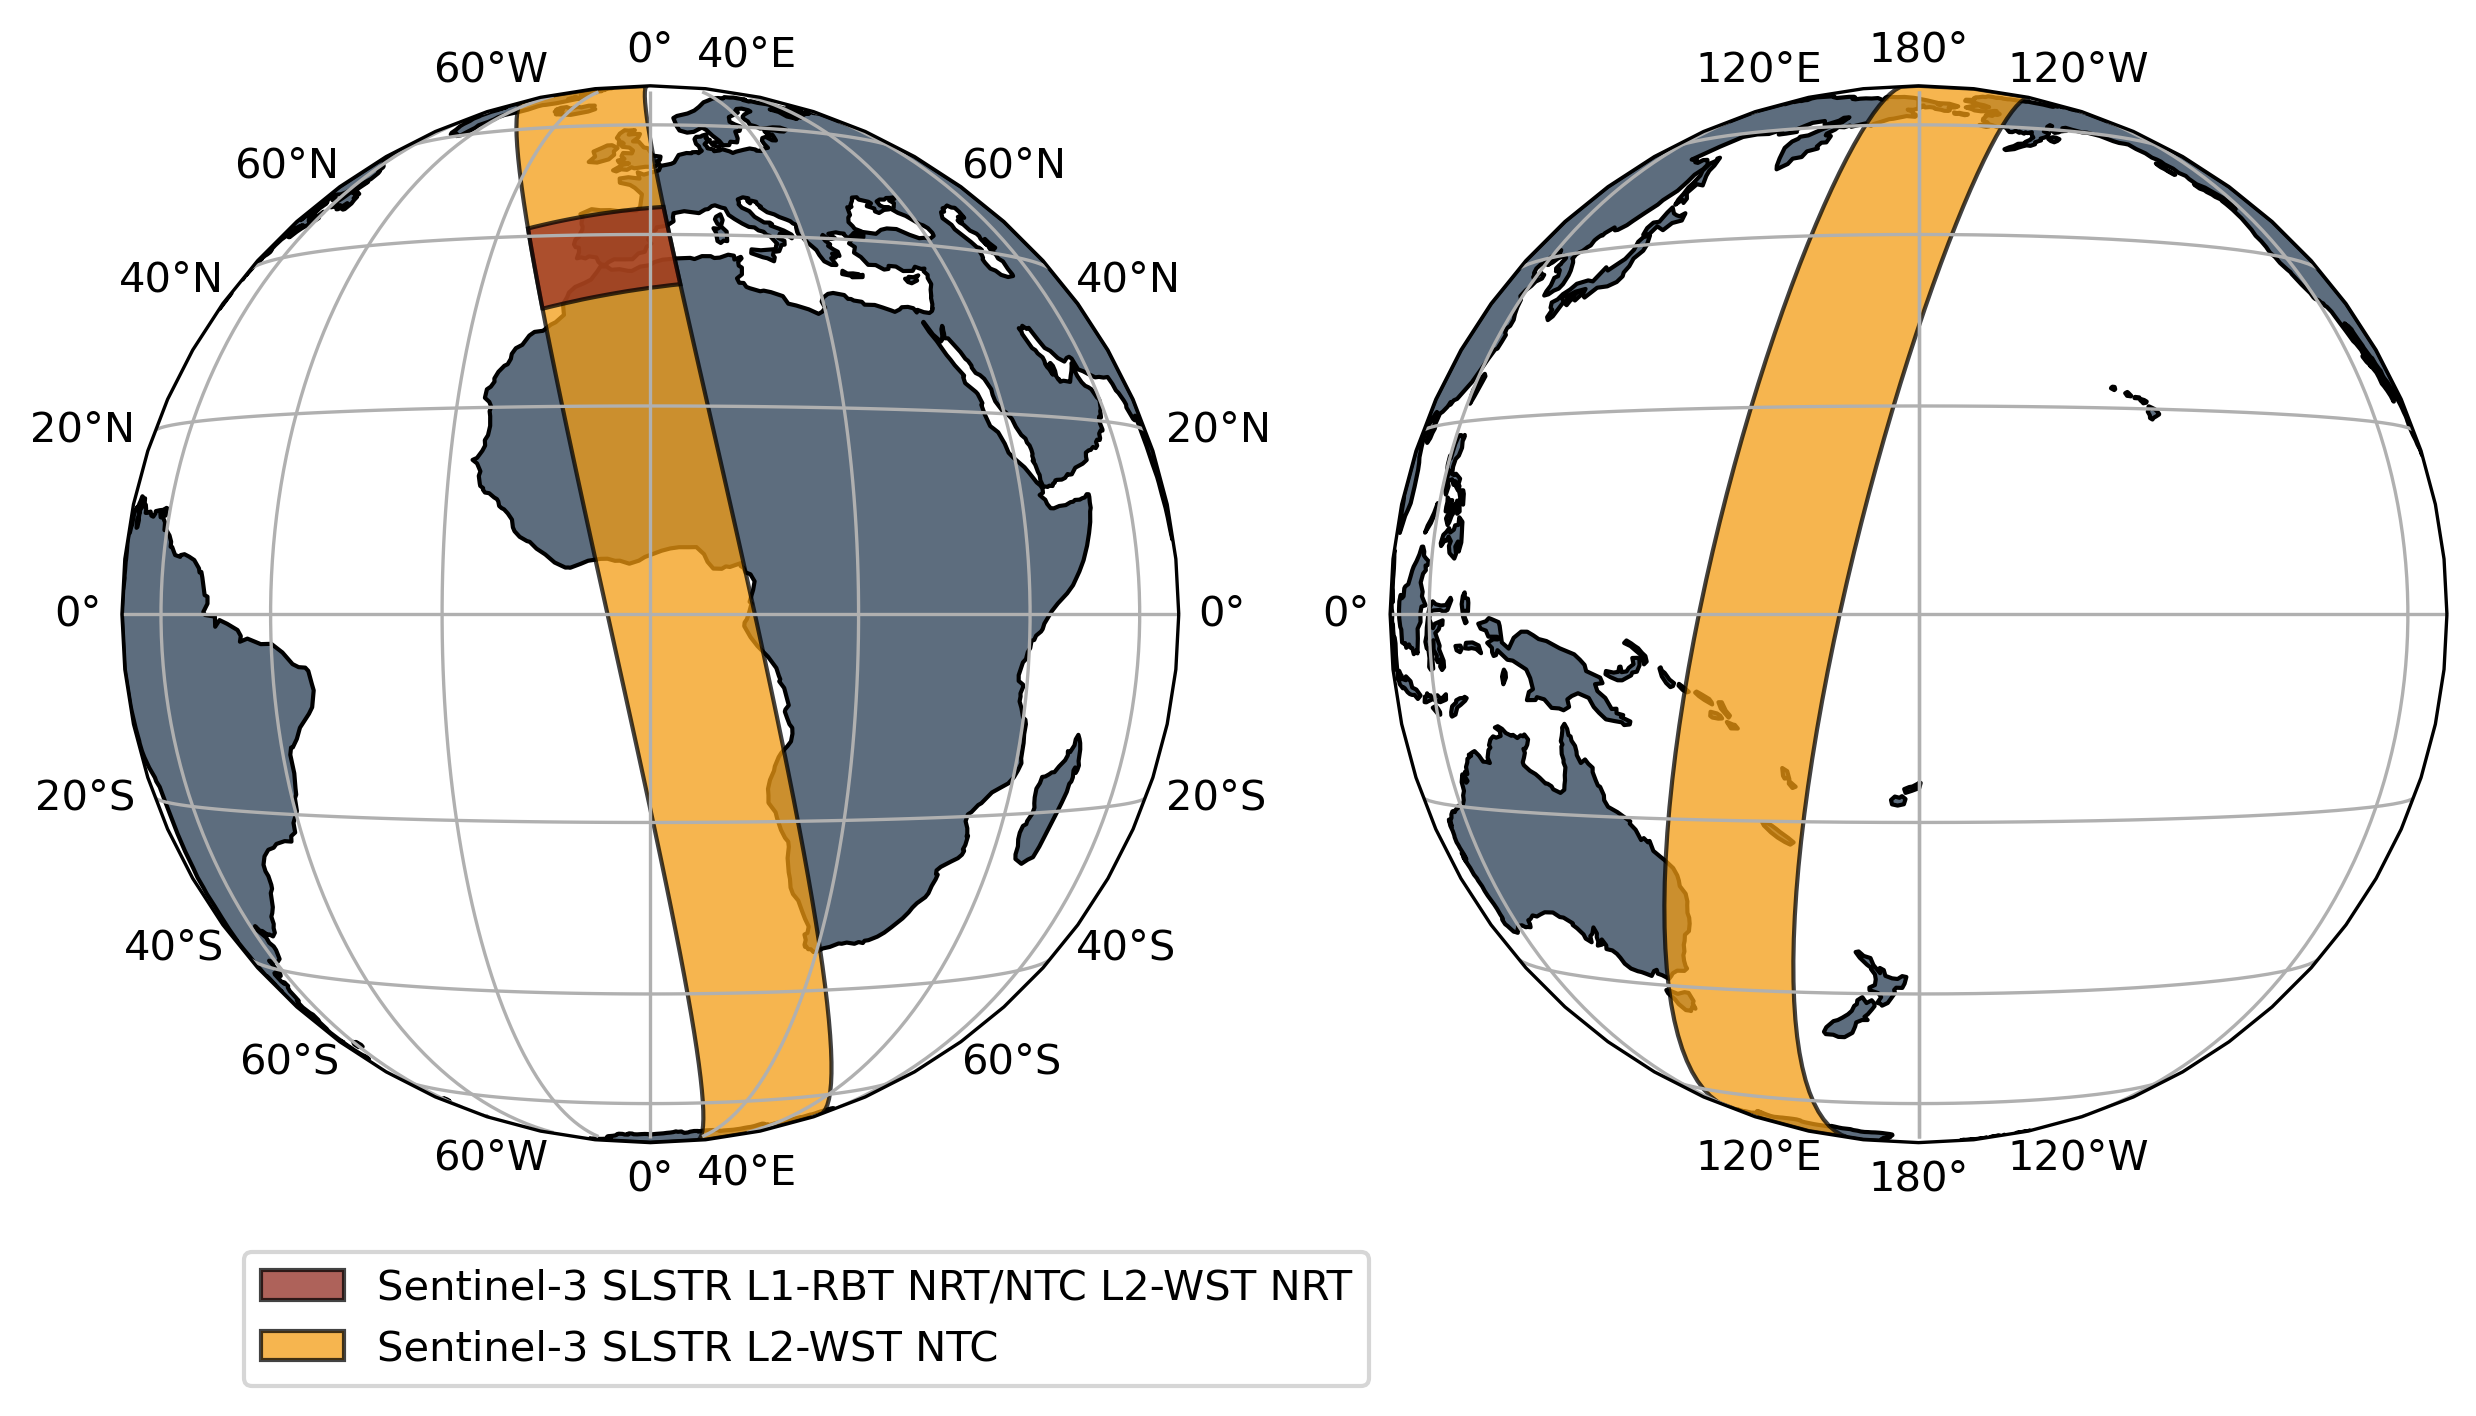

In [5]:
fig1 = plt.figure(figsize=(10, 10), dpi=300)

for loc, clon, clat in zip([1, 2], [0.0, 180.0], [0.0, 0.0]):
    m = plt.subplot(1, 2, loc, projection=cartopy.crs.NearsidePerspective(central_longitude=clon, 
                                                                          central_latitude=clat))
    m.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='k', facecolor='#5D6D7E')
    m.set_global()

    gl = m.gridlines(draw_labels = True)

    colours = ['#922B21', '#F39C12']
    zorders = [2, 1]
    labels = ['Sentinel-3 SLSTR L1-RBT NRT/NTC L2-WST NRT', 'Sentinel-3 SLSTR L2-WST NTC']

    plots = []
    reverse = True
    for polygon, tag, colour, zorder, SAFE_manifest in zip(polygons, tags, colours, zorders, SAFE_manifests):
        coords = np.asarray(polygon.split(' ')).astype('float')
        polygon_geom = Polygon(zip((coords[1::2]), coords[0::2]))
        px = polygon_geom.exterior
        x, y = px.xy
        if reverse == True:
            x = x[::-1]
            y = y[::-1]
        p, = plt.fill(x, y, alpha=0.74, fc=colour, ec='k', transform=cartopy.crs.Geodetic(), zorder=zorder)
        plots.append(p)

plt.legend(plots, labels, loc='lower right', bbox_to_anchor=(0.0, -0.25))
plt.savefig('1_3_SLSTR_coverage.png', bbox_inches='tight')

 In the plot above we can see that the SLSTR products have different PDUs. The level-1 products (as well as the level-2 NRT products) are delivered in frames, whilst the the level-2 NTC products are delivered as stripes that represent an orbits worth of data. 

<hr>
<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_2_SLSTR_file_structure.ipynb"><< SLSTR file structure</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_4_SLSTR_bands_imagery.ipynb">SLSTR bands and imagery >></a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean" target="_blank">View on GitLab</a> | <a href="https://training.eumetsat.int/" target="_blank">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int target="_blank">Contact helpdesk for support </a> | <a href=mailto:training@eumetsat.int target="_blank">Contact our training team to collaborate on and reuse this material</a></span></p>